# QFIE 1.1.0 Release
This notebook aims to illustrate the main changes applied to the QFIE package. As an example the lighting system control introduced in the previous notebook will be considered.
Firstly, let us import the required libraries.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import QFIE.FuzzyEngines as FE

The system is a MISO composed of two input variables and one output variable. In detail:

Inputs:

- Environment Light (env_light): three linguistic terms are considered: 'Dark', 'Medium', 'Light'

- Changing Rate (change_rate): three lingiuistic terms are considered: 'Negative Small', 'Zero', 'Positive Small'

Output:

- Dimmer Control (dimmer_ctrl): four linguistic terms are considered: 'Very Small', 'Small', 'Big', 'Very Big'

    
By running the following cell, the fuzzy sets used are graphically shown. 

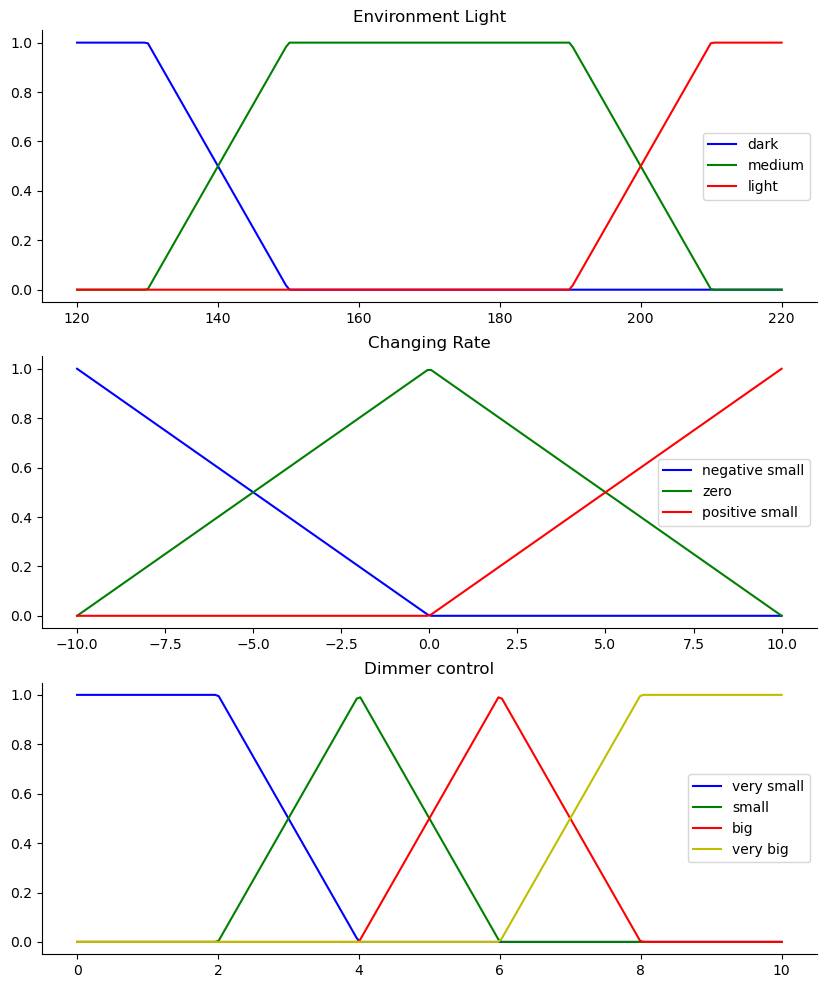

In [2]:
env_light = np.linspace(120, 220, 200)
changing_rate = np.linspace(-10, 10, 200)
dimmer_control = np.linspace(0, 10, 200)



l_dark = fuzz.trapmf(env_light, [120,120,130,150])
l_medium = fuzz.trapmf(env_light, [130,  150, 190,210])
l_light = fuzz.trapmf(env_light, [190,  210, 220, 220])

r_ns = fuzz.trimf(changing_rate, [-10,-10,0])
r_zero = fuzz.trimf(changing_rate, [-10,0,10])
r_ps = fuzz.trimf(changing_rate, [0,10,10])

dm_vs = fuzz.trapmf(dimmer_control, [0,0,2,4])
dm_s = fuzz.trimf(dimmer_control, [2,4,6])
dm_b = fuzz.trimf(dimmer_control, [4,6,8])
dm_vb = fuzz.trapmf(dimmer_control, [6,8,10,10])




# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 12))


ax0.plot(env_light, l_dark, 'b', linewidth=1.5, label='dark')
ax0.plot(env_light, l_medium, 'g', linewidth=1.5, label='medium')
ax0.plot(env_light, l_light, 'r', linewidth=1.5, label='light')
ax0.set_title('Environment Light')
ax0.legend()

ax1.plot(changing_rate, r_ns, 'b', linewidth=1.5, label='negative small')
ax1.plot(changing_rate, r_zero, 'g', linewidth=1.5, label='zero')
ax1.plot(changing_rate, r_ps, 'r', linewidth=1.5, label='positive small')
ax1.set_title('Changing Rate')
ax1.legend()


ax2.plot(dimmer_control, dm_vs, 'b', linewidth=1.5, label='very small')
ax2.plot(dimmer_control, dm_s, 'g', linewidth=1.5, label='small')
ax2.plot(dimmer_control, dm_b, 'r', linewidth=1.5, label='big')
ax2.plot(dimmer_control, dm_vb, 'y', linewidth=1.5, label='very big')
ax2.set_title('Dimmer control')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


plt.show()

The rules base of the system is composed of the following rules: 

- if env_light is dark and change_rate is pos_small then dimmer_ctrl is big
- if env_light is dark and change_rate is zero then dimmer_ctrl is big
- if env_light is dark and change_rate is neg_small then dimmer_ctrl is very_big
- if env_light is medium and change_rate is pos_small then dimmer_ctrl is small
- if env_light is medium and change_rate is zero then dimmer_ctrl is big
- if env_light is medium and change_rate is neg_small then dimmer_ctrl is big
- if env_light is light and change_rate is pos_small then dimmer_ctrl is very_small
- if env_light is light and change_rate is zero then dimmer_ctrl is small
- if env_light is light and change_rate is neg_small then dimmer_ctrl is big

By running the following two cells QFIE is properly initialized



In [3]:
rules = ['if env_light is dark and change_rate is pos_small then dimmer_ctrl is big',
         'if env_light is dark and change_rate is zero then dimmer_ctrl is big',
         'if env_light is dark and change_rate is neg_small then dimmer_ctrl is very_big',
         'if env_light is medium and change_rate is pos_small then dimmer_ctrl is small',
         'if env_light is medium and change_rate is zero then dimmer_ctrl is big',
         'if env_light is medium and change_rate is neg_small then dimmer_ctrl is big',
         'if env_light is light and change_rate is pos_small then dimmer_ctrl is very_small',
         'if env_light is light and change_rate is zero then dimmer_ctrl is small',
         'if env_light is light and change_rate is neg_small then dimmer_ctrl is big']

Firstly, let us initialize the `QuantumFuzzyEngine` class defined in FE. By setting `verbose=True` we will get information about the inference during the computation. Set `verbose=False` if this information is unuseful in your application.

In [4]:
qfie = FE.QuantumFuzzyEngine(verbose=True)

The way in which input and output variables are passed to QFIE remains unchanged:

In [5]:
qfie.input_variable(name='env_light', range=env_light)
qfie.input_variable(name='change_rate', range=changing_rate)
qfie.output_variable(name='dimmer_ctrl', range=dimmer_control)

qfie.add_input_fuzzysets(var_name='env_light', set_names=['dark', 'medium', 'light'], sets=[l_dark, l_medium, l_light])
qfie.add_input_fuzzysets(var_name='change_rate', set_names=['neg_small', 'zero', 'pos_small'], sets=[r_ns, r_zero, r_ps])
qfie.add_output_fuzzysets(var_name='dimmer_ctrl', set_names=['very_small', 'small', 'big', 'very_big'],sets=[dm_vs, dm_s, dm_b, dm_vb])
qfie.set_rules(rules)



The main difference in the new version of  `QuantumFuzzyEngine` is the fact that any backend can be used to compute the quantum circuit. Now the backend is passed as argument of the execute method as Qiskit Backend object, instead that as string.

Let see an example by running an inference process.

In [6]:
el, cr = 140, -5
qfie.build_inference_qc({'env_light':el, 'change_rate':cr}, draw_qc=True, filename='qc_plot.png')


{'env_light': 140, 'change_rate': -5}
Input values  {'env_light': [0.5, 0.5, 0.0], 'change_rate': [0.5, 0.5, 0.0]}


/Users/rschiattarella/Projects/QFIE_Package/src/QFIE/FuzzyEngines.py:277: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.qc["full_circuit"].draw("mpl", filename=kwargs["filename"]).show()


By specifying the filename in the build_inference_qc method a png file containing the quantum circuit plot is created. This is particularly useful when the size of the quantum circuit is big and visualization problems during the execution arise. If filename isn't specified the quantum circuit is shown but not saved.


<img src="qc_plot.png">

At this point the generated QC can be executed with the `execute` method. If not backend is specified then the qc is running by using the Qiskit local QasmSimulator. Any backend can be specified and used. As an example the following execution is carried out by using the noisy FakeMumbai() simulator.

In [7]:
from qiskit.providers.fake_provider import FakeMumbai
qfie.execute(n_shots=1000,  backend=FakeMumbai())[0]

Running qc full_circuit on fake_mumbai
Output Counts {'0001': 0.09833333333333333, '0010': 0.176, '0100': 0.32766666666666666, '1000': 0.191}


5.613499478403967

___
## Distributed-QFIE (D-QFIE)

Another important change in the new release of QFIE package is the possibility of using the Distributed QFIE algorithm introduced in the paper submitted as proceeding for FUZZ-IEEE 2023' Distributing Fuzzy Inference Engines on Quantum Computers - Acampora Giovanni, Massa Alfredo, Schiattarella Roberto, Vitiello Autilia'.

Here the inference process is distributed over more quantum circuits, one for each possible consequent of the system.

This part of the notebook is dedicated to see how D-QFIE can be used as part of the QFIE package.

In this particular control system the output variable is composed of four linguistic terms, therefore four quantum circuits will be created. To activate the D-QFIE inference process use the related flag in build_inference_qc method as follows:

In [11]:
qfie = FE.QuantumFuzzyEngine(verbose=True)
qfie.input_variable(name='env_light', range=env_light)
qfie.input_variable(name='change_rate', range=changing_rate)
qfie.output_variable(name='dimmer_ctrl', range=dimmer_control)

qfie.add_input_fuzzysets(var_name='env_light', set_names=['dark', 'medium', 'light'], sets=[l_dark, l_medium, l_light])
qfie.add_input_fuzzysets(var_name='change_rate', set_names=['neg_small', 'zero', 'pos_small'], sets=[r_ns, r_zero, r_ps])
qfie.add_output_fuzzysets(var_name='dimmer_ctrl', set_names=['very_small', 'small', 'big', 'very_big'],sets=[dm_vs, dm_s, dm_b, dm_vb])
qfie.set_rules(rules)


qfie.build_inference_qc({'env_light':el, 'change_rate':cr}, distributed=True, draw_qc=True, filename='d_qc.png')

{'env_light': 140, 'change_rate': -5}
Input values  {'env_light': [0.5, 0.5, 0.0], 'change_rate': [0.5, 0.5, 0.0]}


By specifying the filename four quantum circuit figures will be saved at the path indicated.

<img src="very_small_d_qc.png">
<img src="small_d_qc.png">
<img src="big_d_qc.png">
<img src="very_big_d_qc.png">

By running the execute method the quantum circuits will be executed and the outputs aggregated in order to obtain the crisp output value. If not backend is specified, then all the quantum circuits will be simulated by means of the noiseless QasmSimulator.

In [12]:
qfie.execute(n_shots=1000)[0]

Running qc very_small on qasm_simulator
Running qc small on qasm_simulator
Running qc big on qasm_simulator
Running qc very_big on qasm_simulator
Output Counts {'0001': 0.0, '0010': 0.0, '0100': 0.7519762845849802, '1000': 0.24802371541501977}


6.657587913604732

Alternatively, a list of backend can be specified and the quantum circuits will be computed on them.

In [13]:
from qiskit.providers.fake_provider import FakeMumbai, FakeMontreal
qfie.execute(n_shots=1000, backend=[FakeMontreal(), FakeMumbai()])[0]

Running qc very_small on fake_montreal
Running qc small on fake_mumbai
Running qc big on fake_montreal
Running qc very_big on fake_mumbai
Output Counts {'0001': 0.09771309771309772, '0010': 0.3277893277893278, '0100': 0.35135135135135137, '1000': 0.22314622314622315}


5.468974659317126

The differences in output computation are related to the noise affecting the circuits simulations by using IBM Fake devices.

The usage of D-QFIE is strongly suggested when noisy devices are used to compute QFIE.